Set up and load data (1)

1. Install dependencies and setup

In [ ]:
pip install tensorflow-gpu==2.8.0

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.0 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.8.0 which is incompatible.
tensorflow 2.9.0 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.8.0 which is incompatible.


In [ ]:
!pip install tensorflow opencv-python matplotlib

  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow-gpu 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.1 which is incompatible.


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'sample_data'

In [ ]:
os.listdir(data_dir)

['happy', '.ipynb_checkpoints', 'sad']

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

['613k1XcpYCL.jpg',
 'images18.jpg',
 'habits-of-happy-people-jpg.jpg',
 'images13.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 'images33.jpg',
 'image12.jpeg',
 'image22.jpeg',
 'image15.jpeg',
 'GettyImages-871518740.jpg',
 'happy-people3.jpg',
 'group-young-people-posing-photo_52683-18823.jpg',
 'images23.jpg',
 'images9.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'image9.jpeg',
 'image26.jpeg',
 'images27.jpg',
 'image24.jpeg',
 'image7.jpeg',
 'stock-photo-portrait-of-smiling-young-friends-walking-outdoors-together-1392193913.jpg',
 'image27.jpeg',
 'image.jpeg',
 'image30.jpeg',
 'image32.png',
 'image13.jpeg',
 'image21.jpeg',
 '170404-happy-workers-feature.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'happy-woman-in-nature-at-sunset.jpg',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image sample_data/sad/.ipynb_checkpoints


3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('sample_data')

Found 462 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

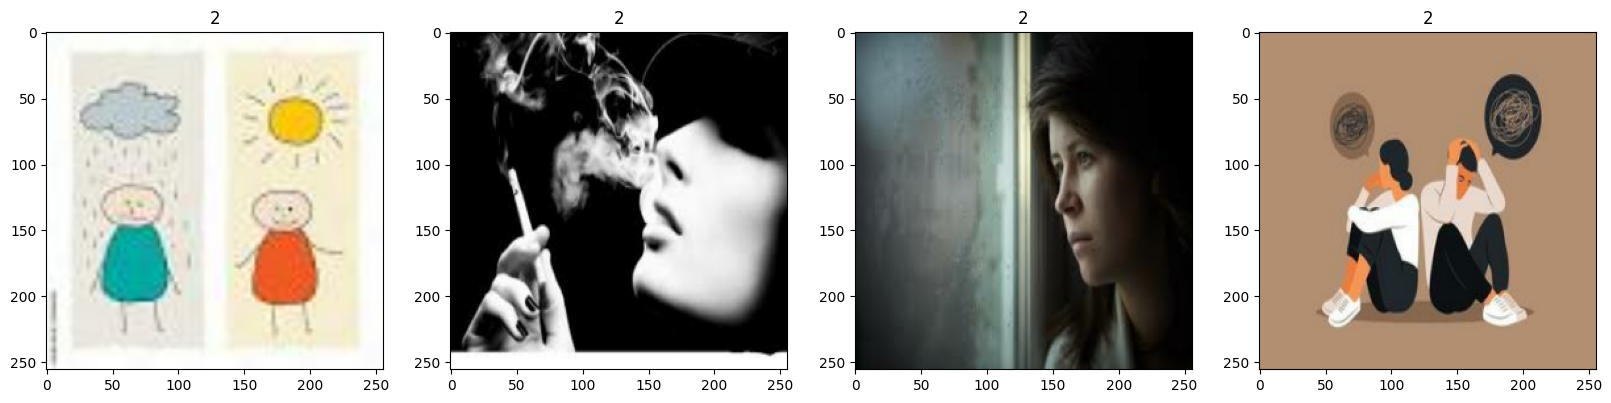

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.8862745 , 0.90588236, 0.92156863],
          [0.8862745 , 0.90588236, 0.92156863],
          [0.8862745 , 0.90588236, 0.92156863],
          ...,
          [0.8509804 , 0.8784314 , 0.9098039 ],
          [0.8509804 , 0.8784314 , 0.9098039 ],
          [0.8509804 , 0.8784314 , 0.9098039 ]],
 
         [[0.8862745 , 0.90588236, 0.92156863],
          [0.8862745 , 0.90588236, 0.92156863],
          [0.8862745 , 0.90588236, 0.92156863],
          ...,
          [0.8509804 , 0.8784314 , 0.9098039 ],
          [0.8509804 , 0.8784314 , 0.9098039 ],
          [0.8509804 , 0.8784314 , 0.9098039 ]],
 
         [[0.8862745 , 0.90588236, 0.92156863],
          [0.8862745 , 0.90588236, 0.92156863],
          [0.8862745 , 0.90588236, 0.92156863],
          ...,
          [0.8509804 , 0.8784314 , 0.9098039 ],
          [0.8509804 , 0.8784314 , 0.9098039 ],
          [0.8509804 , 0.8784314 , 0.9098039 ]],
 
         ...,
 
         [[0.3269531 , 0.2219669 , 0.11464078],
          [0.45246

5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

10

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. Build Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.9.0


In [ ]:
pip install --upgrade tensorflow==2.9

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Add layers and configure the model here


In [ ]:
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

7. Train

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 33s 3s/step - loss: -123.9643 - accuracy: 0.3125 - val_loss: -613.4953 - val_accuracy: 0.2917
Epoch 2/20
10/10 [==============================] - 34s 3s/step - loss: -2463.3569 - accuracy: 0.3156 - val_loss: -7002.6250 - val_accuracy: 0.3854
Epoch 3/20
10/10 [==============================] - 32s 3s/step - loss: -19970.4531 - accuracy: 0.3313 - val_loss: -55815.7617 - val_accuracy: 0.2708
Epoch 4/20
10/10 [==============================] - 34s 3s/step - loss: -114134.9609 - accuracy: 0.3219 - val_loss: -254452.2656 - val_accuracy: 0.3021
Epoch 5/20
10/10 [==============================] - 35s 3s/step - loss: -454610.3438 - accuracy: 0.3344 - val_loss: -980676.5000 - val_accuracy: 0.3333
Epoch 6/20
10/10 [==============================] - 34s 3s/step - loss: -1638974.3750 - accuracy: 0.3313 - val_loss: -3224198.0000 - val_accuracy: 0.2812
Epoch 7/20
10/10 [==============================] - 31s 3s/step - loss: -4685465.0000 - accuracy: 

8. Plot Performance

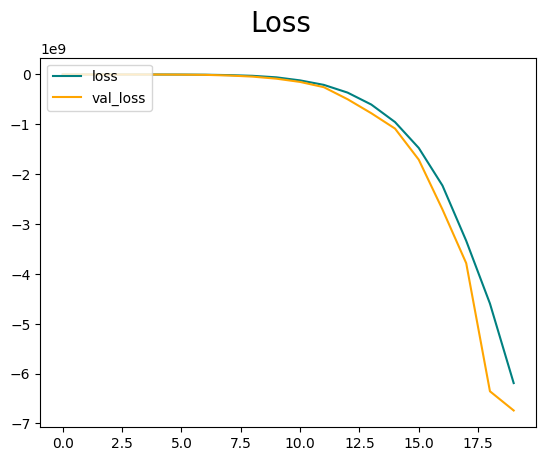

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

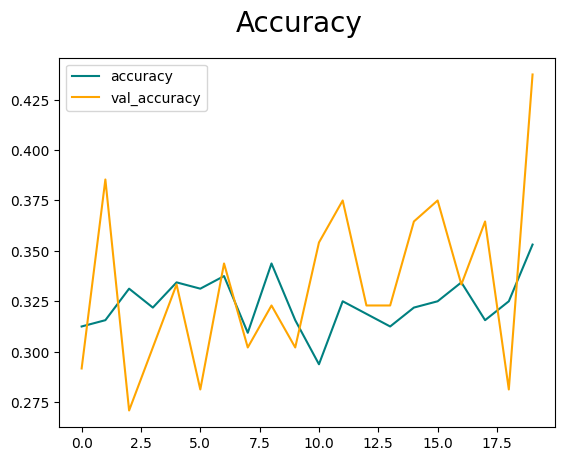

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 643ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.34375, shape=(), dtype=float32)


10. Test

In [ ]:
import cv2

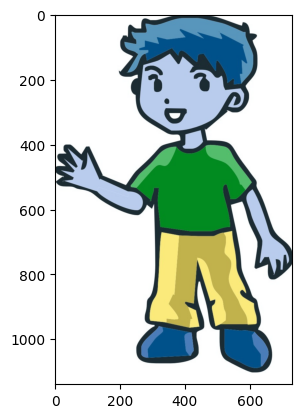

In [ ]:
img = cv2.imread('/content/sample_data/happytest.jpg')
plt.imshow(img)
plt.show()

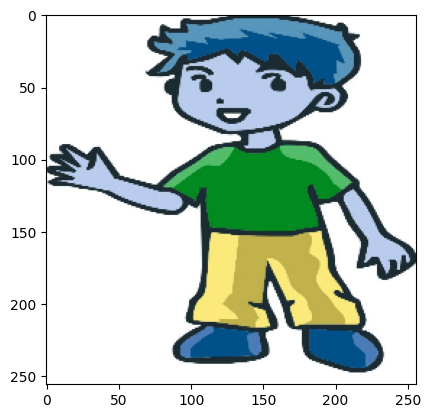

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 104ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 2:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
